# Intro to Geo-Spatial Analysis


## Introduction

In this chapter, you'll learn the basics of geospatial analysis with code.

You should be aware when following this chapter that installing geographic analysis packages isn't always the easiest and things can and do go wrong! (Some geospatial analysis courses recommend running everything in a Docker container.)

There are two types of spatial data geographic information systems (GIS): vector and raster. Vector spatial data are made up of vertices and paths. These are represented computationally by points (zero-dimensional objects, if you like), lines (1D objects), and polygons (2D objects, aka an area). Vector data are analogous to vector image formats, like .eps and .pdf, they are smooth and well-defined regardless of the level of zoom you look at them (on a map). Raster data are composed of pixels, also known as grid cells. Each cell has a different value and the raster map is overlaid on a map. Raster data are better for continuous variables such as temperature or rainfall, while vector data are better suited to political boundaries and features like roads. In this book, we'll only cover vector geospatial data analysis (if you need to work with rasters, check out [rasterio](https://rasterio.readthedocs.io/en/latest/)).

Common file formats for vector data include Shapefile (.shp...), GeoJSON/JSON, KML and GeoPackage.

### Coordinate Reference Systems

A Coordinate Reference System (CRS) associates numerical coordinates with a position on the surface of the Earth. Latitude and longitude are an example (and have units of degrees) but there are many CRSs. They are important because they define how your data will look on a map. Think about it like this: in the case of the usual charts you plot, you usually take it as given that you are working in a space that is 2D with an X- and Y-basis vector. But the most basic object in mapping is a *sphere*, which is fundamentally different to a 2D plane. This means you have to choose whether to show part of a globe or all of a 2D representation of a globe (a *projection*), which inevitably introduces distortions.

The type main classes of CRS are geographic or projection. A geographic CRS uses a 3D model of the Earth and 'drapes' the data over it.

A projected CRS has the geographic CRS plus a map projection that has co-ordinates on a 2D plane. It is well known that there is no distortion-free projection from a globe to a plane; you cannot preserve areas, shapes, distances, and angles simultaneously. Different map projections introduce different distortions, as lovingly shown in this [xkcd](https://xkcd.com/977/) cartoon.

One example of a map projection is the Mercator projection, which is a *conformal mapping*, i.e. a mapping that locally preserves angles, but not necessarily lengths. In fact, Mercator distorts areas, especially the further away an area is from the equator. Some projections are better for some purposes than others.

![XKCD Bad Map Projection: South America](https://imgs.xkcd.com/comics/bad_map_projection_south_america.png)

XKCD: Bad Map Projection: South America

Some analysis tools expect geospatial data to be in a projected CRS-this is true of the main package we'll use, **geopandas**. This is usually not a problem for economic data; it's rare that the curvature of the Earth becomes a factor (though distances might in some rare situations). Most spatial libraries expect that all of the data that are being combined be in the same CRS.

CRSs are usually referenced by an [EPSG code](https://epsg.io/). Two widely used CRSs are WGS84 (aka EPSG: 4326) which provides a good representaiton of most places on Earth and NAD83 (aka EPSG: 4269), which provides a good representation of the USA.

Why are we banging on about this? Because maps and geometry objects come in different CRS and it's worth being aware of that so that you can ensure they are in the same format, and that you have the right CRS for your purposes.

### Imports and packages

We'll be using [**geopandas**](https://geopandas.org/index.html), the go-to package for vector spatial analysis in Python. The easiest way to install this package is using `conda install geopandas`; if you want to install it via pip then look at the [install instructions](https://geopandas.org/install.html). 

Let's import some of the packages we'll be using:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import geopandas as gpd
from pathlib import Path

In [2]:
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
# For this chapter, some bespoke settings:
plt.style.use(
    {
        "axes.autolimit_mode": "data",
        "patch.linewidth": 0.2,
        "figure.figsize": (10, 8),
        "figure.dpi": 125,
    }
)

## Geopandas dataframes

Quite literally, **GeoPandas** is a combination of geo and pandas so the good news is that everything you know about using **pandas** dataframes can be re-used here for geospatial data. The geo part adds functionality for geo-spatial data.

### Input and Output

So, first, we need some geo-spatial data to analyse. There are several different file formats for geo-spatial data, such as Shapefile (.shp), GeoJSON/JSON, KML, and GeoPackage.

We'll use a Shapefile of the countries of the world from [Natural Earth](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-admin-0-countries-2/). It comes as a zip file; unzip it and one of the files ends in .shp, which is the one we load with **geopandas**.

Let's load the data and look at the first few rows:

In [3]:
# To run this example, you will need to download the files at this url:
# https://github.com/aeturrell/coding-for-economists/tree/main/data/geo/world
# and save them in the path 'data/geo/world' (path relative to where you're running the code)
df = gpd.read_file(Path("data/geo/world/ne_50m_admin_0_countries.shp"))
df.head(3)

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          3   Zimbabwe    ZWE         0      2   
1  Admin-0 country          1          3     Zambia    ZMB         0      2   
2  Admin-0 country          1          3      Yemen    YEM         0      2   

                TYPE     ADMIN ADM0_A3  ...  NAME_KO   NAME_NL   NAME_PL  \
0  Sovereign country  Zimbabwe     ZWE  ...     짐바브웨  Zimbabwe  Zimbabwe   
1  Sovereign country    Zambia     ZMB  ...      잠비아    Zambia    Zambia   
2  Sovereign country     Yemen     YEM  ...       예멘     Jemen     Jemen   

    NAME_PT   NAME_RU   NAME_SV   NAME_TR   NAME_VI NAME_ZH  \
0  Zimbábue  Зимбабве  Zimbabwe  Zimbabve  Zimbabwe     辛巴威   
1    Zâmbia    Замбия    Zambia   Zambiya    Zambia     赞比亚   
2     Iémen     Йемен     Jemen     Yemen     Yemen      也门   

                                            geometry  
0  POLYGON ((31.28789 -22.40205, 31.19727 -22.344...  
1  POLYGON ((30.39609 -15.64307, 30.25068 -15.643...  
2  MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...  

[3 rows x 95 columns]

There's a lot of info here, but a lot of it is different labelling. The dataset has one country per row.

To save the data frame, use `df.to_file("output_name.shp")` for shapefiles. For other output formats use, for example, `df.to_file("output_name.geojson", driver="GeoJSON")`.

### Basics

Let's see what we get when we call the humble plot function on the data we already read in!

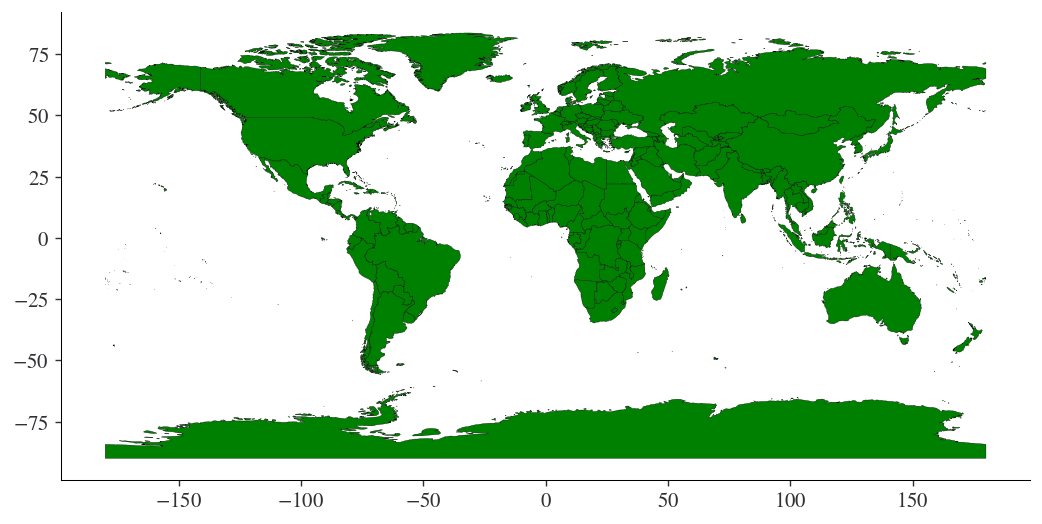

In [4]:
df.plot(color="green");

I think it's glorious just how easy this is to use. 

Because **geopandas** builds on **pandas**, we can do all of the usual pandas-like operations such as filtering based on values. Here's how to filter to an individual country (one with a recognisable shape!):

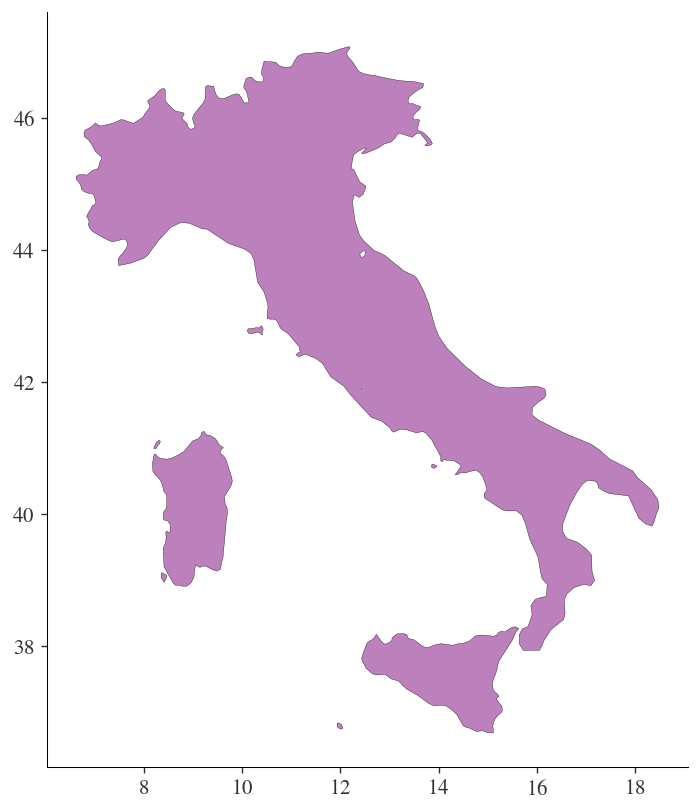

In [5]:
df[df["ADMIN"] == "Italy"].plot();

Note that it is the last column in the dataframe, the `geometry` column, that makes this sorcery possible.

### Working with Coordinate Reference Systems

We can check what the CRS of this entire **geopandas** dataframe is:

In [6]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can switch between CRS using the `to_crs` function. Let's see the world map we plotted earlier using the WGS84 projection and also using some other projectsion, including the dreaded Meractor projection. Mercator looks completely ridiculous if we don't drop Antarctica first, so let's get shot of it for all the projections. (You can find a list of projections [here](https://proj.org/operations/projections/index.html).)

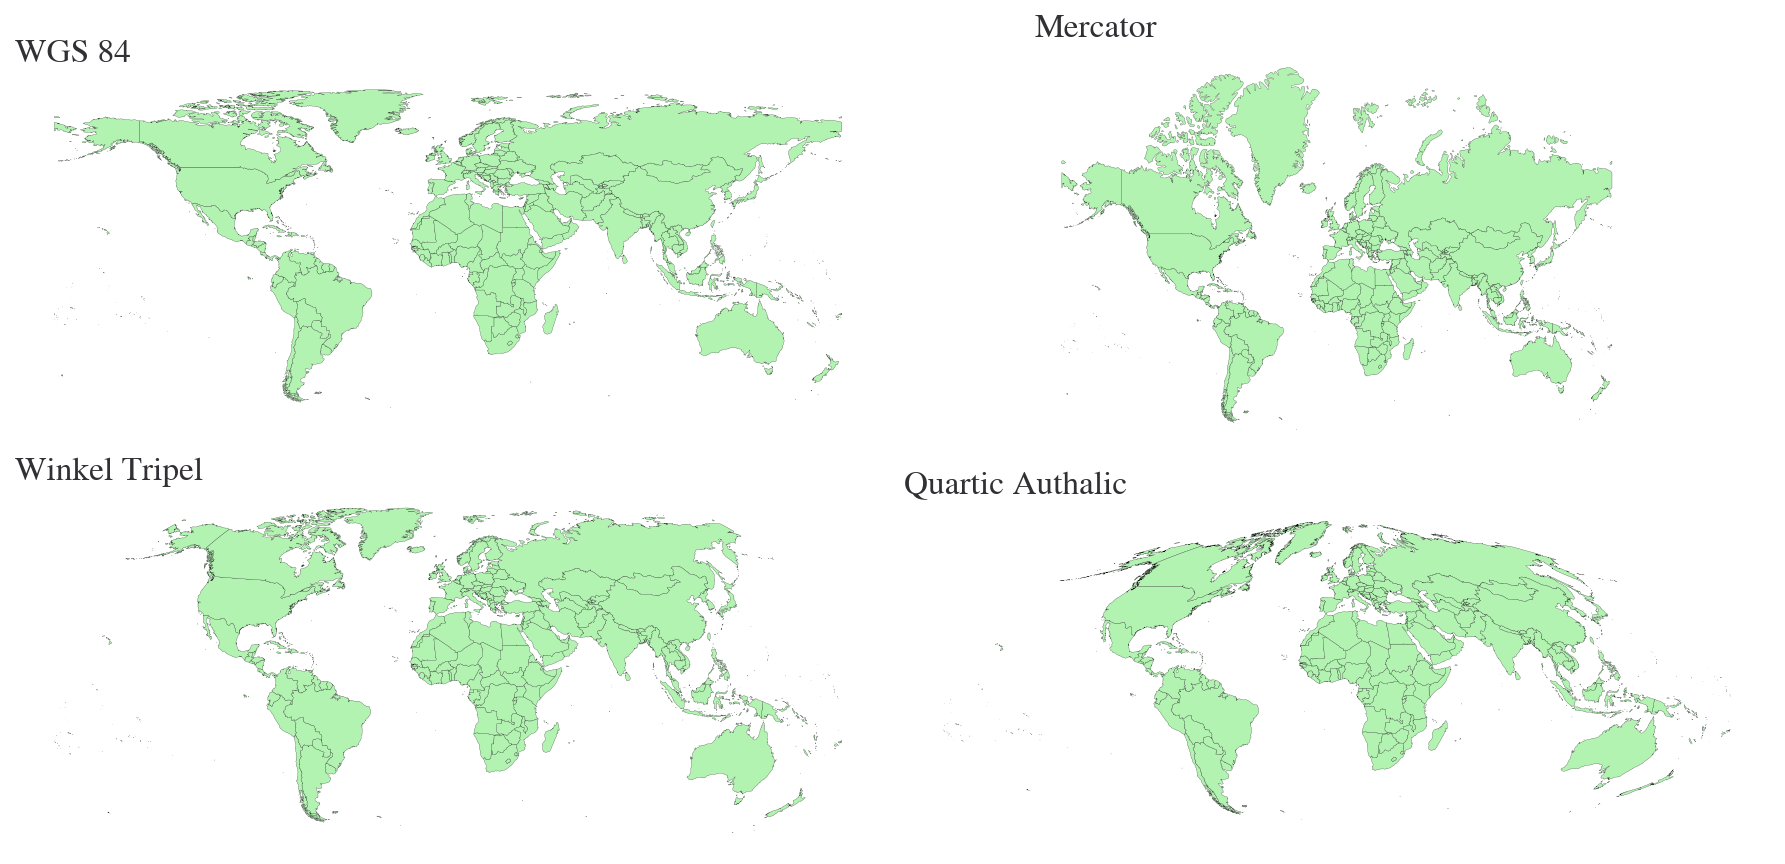

In [7]:
exclude_admins = ["Antarctica", "French Southern and Antarctic Lands"]
proj_names = ["WGS 84", "Mercator", "Winkel Tripel", "Quartic Authalic"]
crs_names = ["EPSG:4326", "EPSG:3395", "+proj=wintri", "+proj=qua_aut"]

world_no_antrtc = df[~df["ADMIN"].isin(exclude_admins)]

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(12, 6), dpi=150, sharex=False, sharey=False
)
for i, ax in enumerate(axes.flat):
    world_no_antrtc.to_crs(crs_names[i]).plot(ax=ax, color="#b2f3b2", linewidth=0.1)
    ax.set_title(proj_names[i])
    ax.axis("off")
plt.tight_layout()
plt.show();

## Manipulating Space

### Basics

Let's look more closely at the objects that encode the shapes of the countries on our world map:

In [8]:
df.loc[df["ADMIN"] == "Italy", "geometry"]

137    MULTIPOLYGON (((7.02109 45.92578, 7.05576 45.9...
Name: geometry, dtype: geometry

The object is a multipolygon. Remember that we have points (0D), lines (1D), and polygons (aka areas, 2D) that we can embed in a projection. A line is at least 2 vertices that are connected; a polygon is the area contained within 3 or more vertices. Multipolygons are the union of two or more non-contiguous polygons: in this case, the Italian mainland, Sicily, and Sardinia.

The `plot` function works just as happily if our basic objects are points rather than polygons though. In the below example, we'll grab the centroid (the spatial midpoint) of each country as a point and plot them:

<ipython-input-9-7dc699e217d7>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["centroid"] = df.centroid


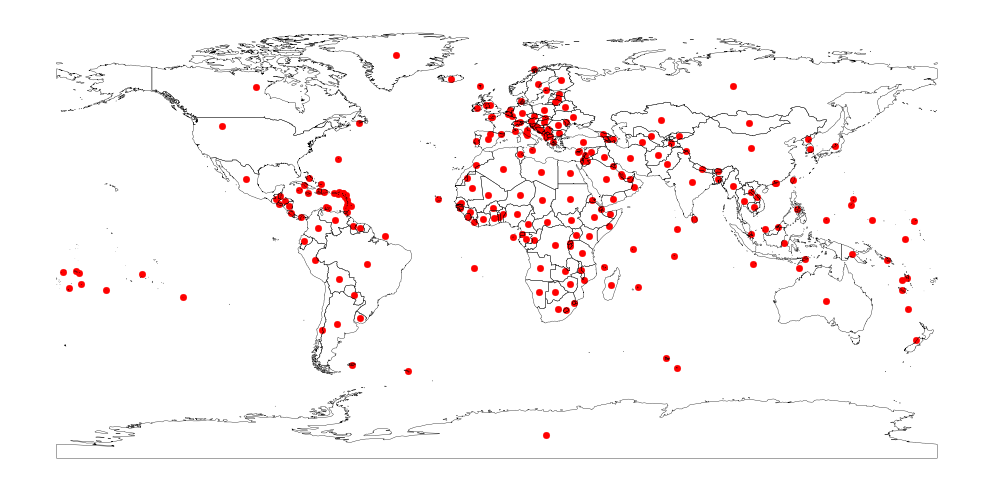

In [9]:
df["centroid"] = df.centroid

fig, ax = plt.subplots()
ax.axis("off")
df.boundary.plot(ax=ax, lw=0.2, color="k")
df["centroid"].plot(ax=ax, color="red", markersize=15)
plt.show()

Let's explore those basic building blocks a bit more. A point at position (1, 2) is defined as follows (**shapely** is used by **geopandas**):

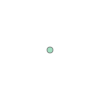

In [10]:
from shapely.geometry import Point

point = Point(1, 2)
point

A point doesn't have much other than a single position in 2D space. But lines have length, and polygons have area.

There are different kinds of lines but the simplest is the `LineString` which can be constructed from a sequence of points.

Length of line is 11.78


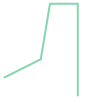

In [11]:
from shapely.geometry import LineString

line = LineString(
    [Point(0.0, 1.0), Point(2.0, 2.0), Point(2.5, 5.0), Point(4, 5), Point(4, 0)]
)
print(f"Length of line is {line.length:.2f}")
line

We already saw Polygons in the shape of Italy. But here's a much simpler one:

The area of the poly is 0.5


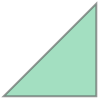

In [12]:
from shapely.geometry import Polygon

poly = Polygon([(0, 0), (1, 1), (1, 0)])
print(f"The area of the poly is {poly.area}")
poly

### Spatial Operations

We've seen the basic builidng blocks of geometries: points, lines, and polygons. We've also seen how to retireve some basic properties of these such as length, area, and centroid. In this section, we'll see some slightly more advanced spatial operations that you can perform with **geopandas**.

#### Point-in-polygon

This does pretty much what you'd expect! It's useful in practice because we might want to know if a particular place falls within one area or another. As a test, let's see if the centroid for Germany actually falls within the Germany polygon.

In [13]:
df_row = df.loc[df["ADMIN"] == "Germany", :]
df_row["geometry"].iloc[0].contains(df_row["centroid"].iloc[0])

True

But be careful with this! Countries can have complex multi-polygon geometries for which a centroid is not guaranteed to be within any of the polygons. France is a great example as French Guiana is so far away that it pulls the centroid just out of the mainland:

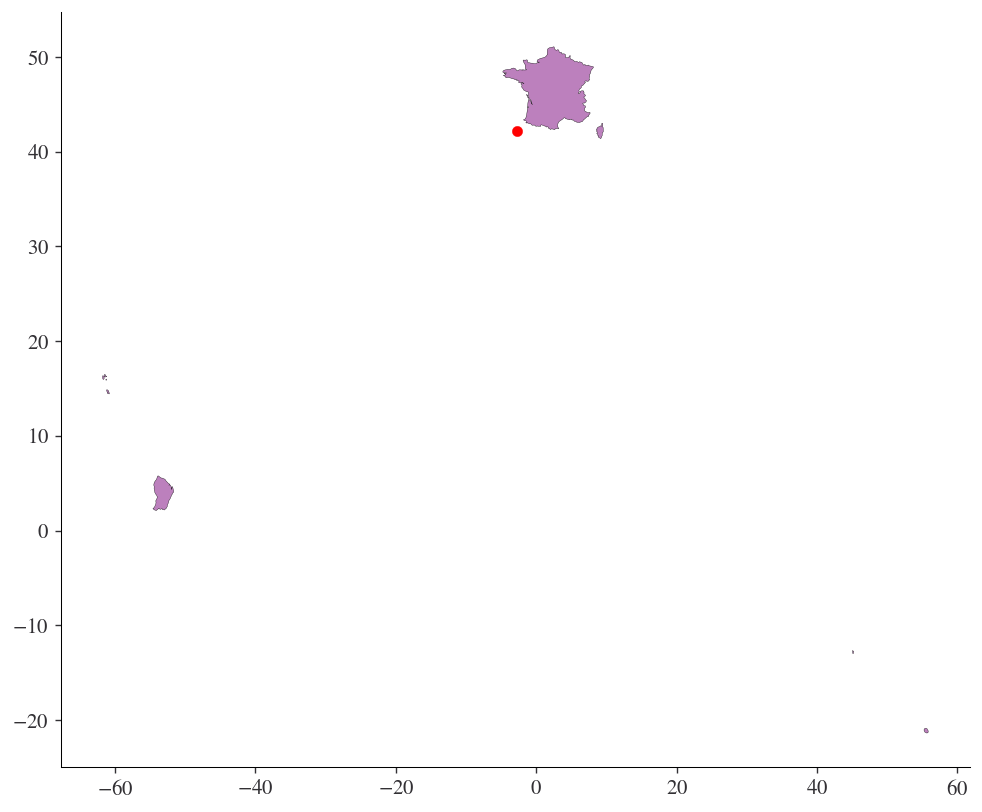

In [14]:
fig, ax = plt.subplots()
df_row = df.loc[df["ADMIN"] == "France", :]
df_row["geometry"].plot(ax=ax)
df_row["centroid"].plot(ax=ax, color="red");

#### Buffers

Buffers are just an area drawn around a particular geometry, given a specific radious. They have a great practical use in computing catchment areas and so on. To create a buffer around the geometry you're currently using, use the `df.buffer(number)` command to return a column with the buffered version of your geometry in. Be aware that the units of the CRS you're using will determine the units of the buffer.

### Spatial set operations

More complex spatial manipulation can be achieved through spatial set operations. The figure below shows some examples for polygons (but the same principles apply for lines and polygons too):

<img src="https://geopandas.org/_images/overlay_operations.png" alt="Spatial operations"></a>

Different set operations with two polygons. Source: QGIS documentation.

In addition to these, there are 'crosses' (for two lines) and 'touches'. You can find information about all of the set operations that are available [here](https://geopandas.org/set_operations.html).

To demonstrate one of these, let's see if we can pick out a few regions that are *intersected* by a river. We'll try out the river Trent, which passes through England, and we'll see which *Local Authority Districts* (LADs) it passes through. First, we load the UK data, which is from the [ONS Open Geography Portal](https://geoportal.statistics.gov.uk/datasets/local-authority-districts-may-2020-boundaries-uk-buc):

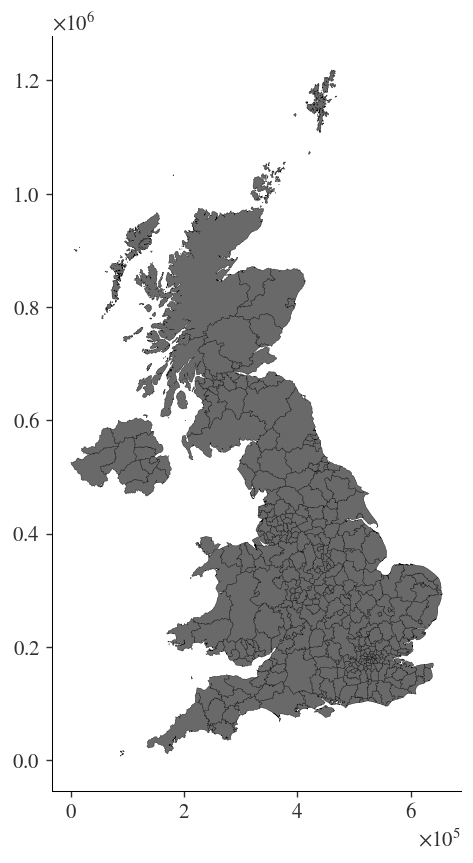

In [15]:
# To run this example, you will need to download the files at this url:
# https://github.com/aeturrell/coding-for-economists/tree/main/data/geo/uk_lad
# and save them in the path 'data/geo/uk_lad' (path relative to where you're running the code)
dfuk = gpd.read_file(
    Path("data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.shp")
)
dfuk.plot(color="dimgrey");

Next we bring in data on major rivers and pass it through the same projection as our map of England is using:

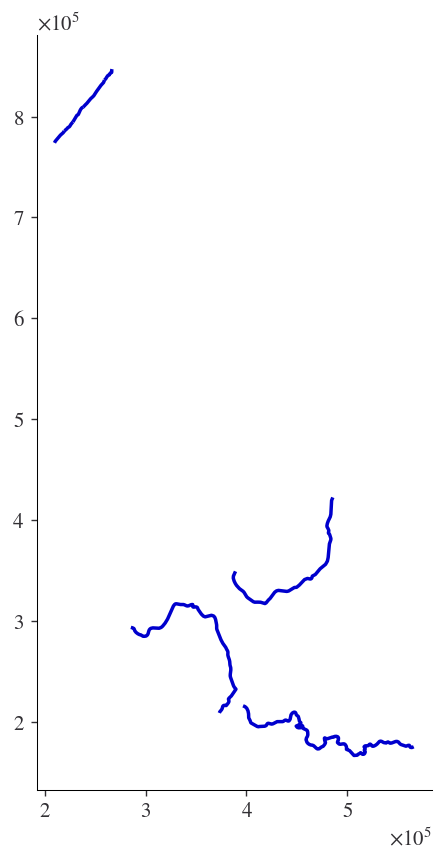

In [16]:
# To run this example, you will need to download the files at this url:
# https://github.com/aeturrell/coding-for-economists/tree/main/data/geo/rivers
# and save them in the path 'data/geo/rivers' (path relative to where you're running the code)
river = gpd.read_file(Path("data/geo/rivers/rivers.shp"))
river = river.to_crs(dfuk.crs)
river.plot(color="mediumblue");

We can now combine these for a view on how these rivers goes through the UK. We will use `buffer` to modify how easy it is to visualise the river by asking for everything within 1.5 km from the river.

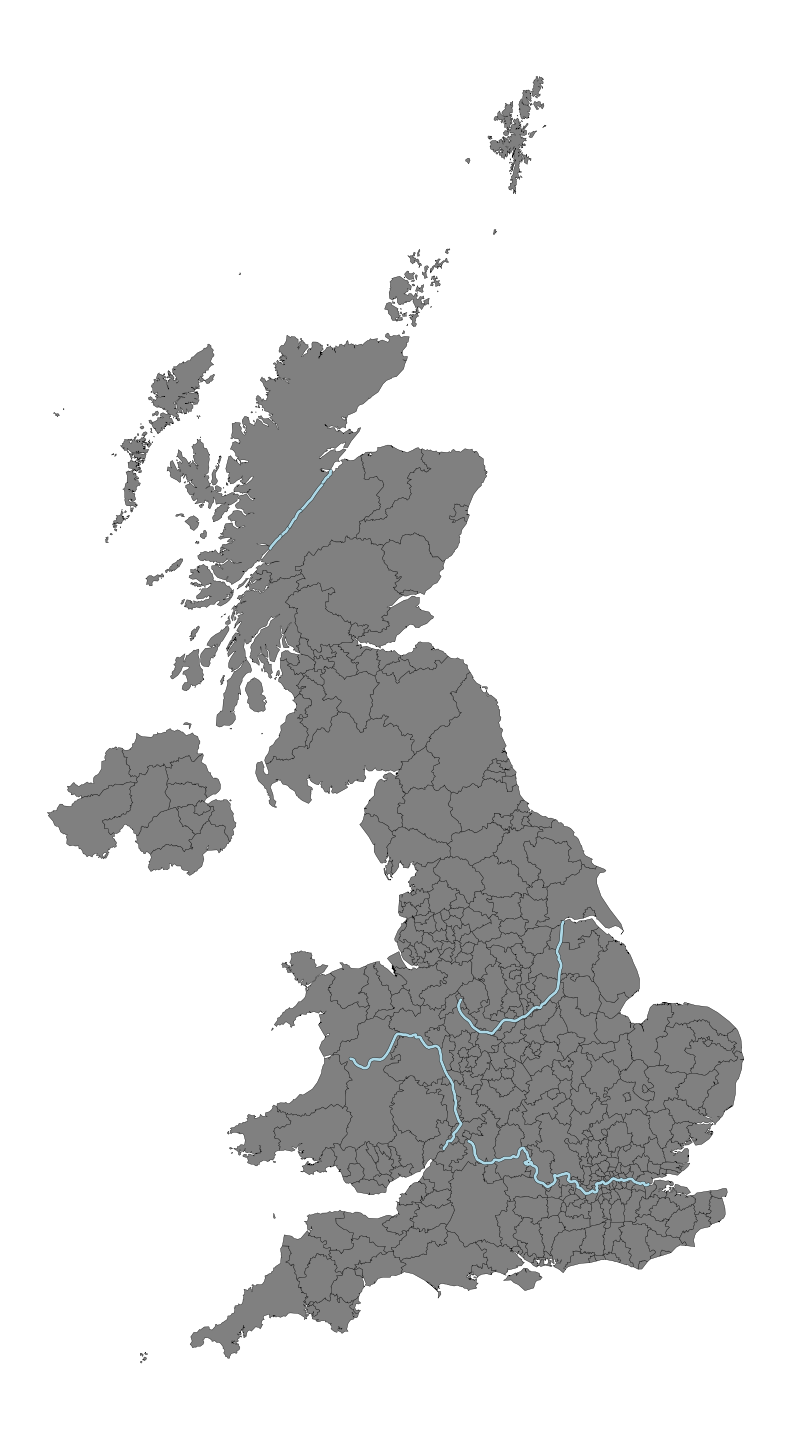

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
dfuk.plot(color="grey", ax=ax)
river.buffer(1.5e3).plot(ax=ax, color="lightblue");

Let's turn our focus to one river: the Trent. We will ask which of the regions are intersected by that river and plot only those parts. We'll also add some annotations for the names of the regions.

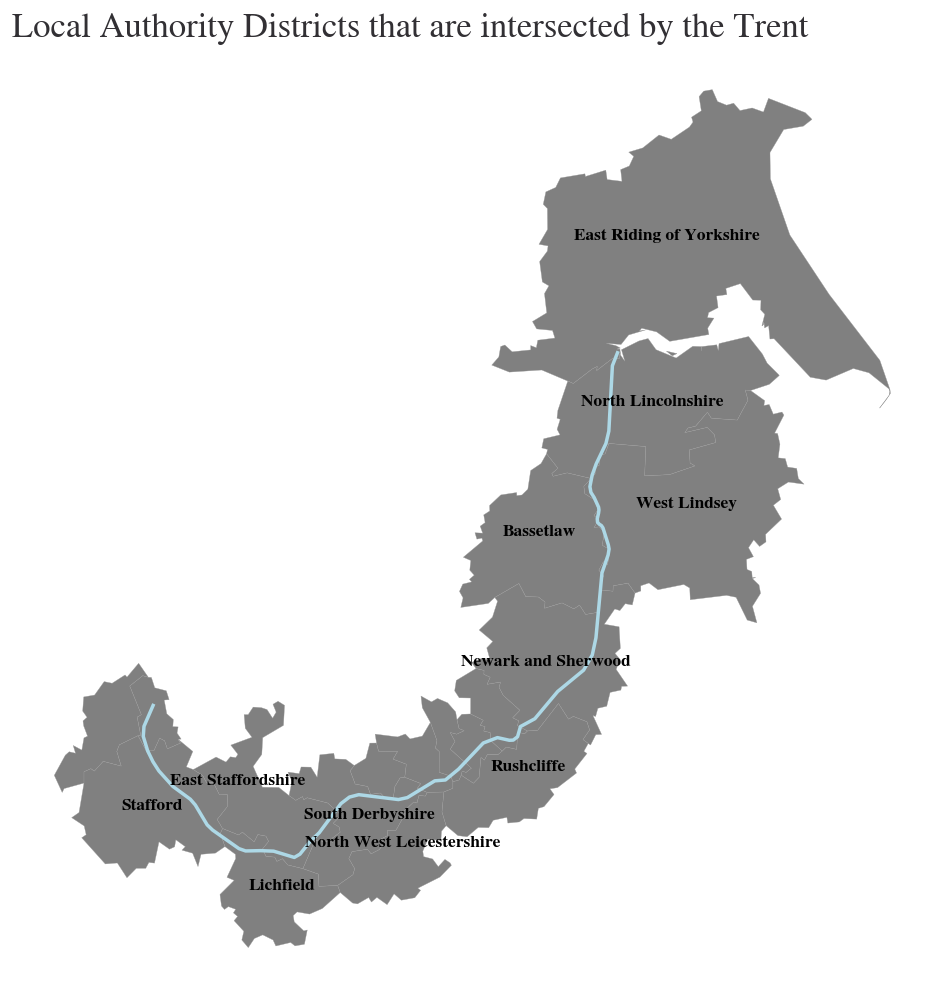

In [18]:
# Restrict river to just one
river_name = "Trent"
river = river[river["name"] == river_name]

# Find a subset of the regions that is intersected by the river by creating new True/False column
dfuk["river"] = dfuk["geometry"].apply(
    lambda x: river["geometry"].buffer(1e3).intersects(x)
)

# The rest of the code is just related to plotting:

# Create a cut of dfuk for convenience
df_th = dfuk[dfuk["river"]].copy()

# Get a representative point for each region to annotate
df_th["coords"] = (
    df_th["geometry"].representative_point().apply(lambda x: x.coords[:][0])
)

# Plotting bits
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
df_th.plot(color="grey", ax=ax, edgecolor="0.6")
river.plot(color="lightblue", ax=ax)

# Add text annotation to the largest polygons
for idx, row in df_th.iterrows():
    if row["geometry"].area > np.quantile(df_th.area, q=0.4):
        ax.annotate(
            text=row["LAD20NM"],
            xy=row["coords"],
            horizontalalignment="center",
            weight="bold",
            fontsize=10,
            color="black",
        )
ax.set_title(
    f"Local Authority Districts that are intersected by the {river_name}",
    loc="left",
    fontsize=20,
)
plt.show()

Note that the way we set this up to use `river_name` as an input variable means we could oh so easily wrap everything up in a function that did this for other rivers. Oh go on then, let's see how that works *because* it shows how scalable operations are once you do them in *code*:



In [19]:
def river_intersect_plot(river_name):
    """
    Given the name of a river, shows a plot of the LADs that it intersects.
    """
    river = gpd.read_file(os.path.join("data", "geo", "rivers", "rivers.shp"))
    river = river[river["name"] == river_name]
    river = river.to_crs(dfuk.crs)
    dfuk["river"] = dfuk["geometry"].apply(
        lambda x: river["geometry"].buffer(2e3).intersects(x)
    )
    df_th = dfuk[dfuk["river"]].copy()
    df_th["coords"] = (
        df_th["geometry"].representative_point().apply(lambda x: x.coords[:][0])
    )
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    df_th.plot(color="grey", ax=ax, edgecolor="0.6")
    river.plot(color="lightblue", ax=ax)
    for idx, row in df_th.iterrows():
        if row["geometry"].area > np.quantile(df_th.area, q=0.6):
            ax.annotate(
                text=row["LAD20NM"],
                xy=row["coords"],
                horizontalalignment="center",
                weight="bold",
                fontsize=10,
                color="black",
            )
    ax.set_title(
        f"Local Authority Districts that are intersected by the {river_name}",
        loc="left",
        fontsize=20,
    )
    plt.show()

With our function defined, we can do the whole thing for a completely different river:

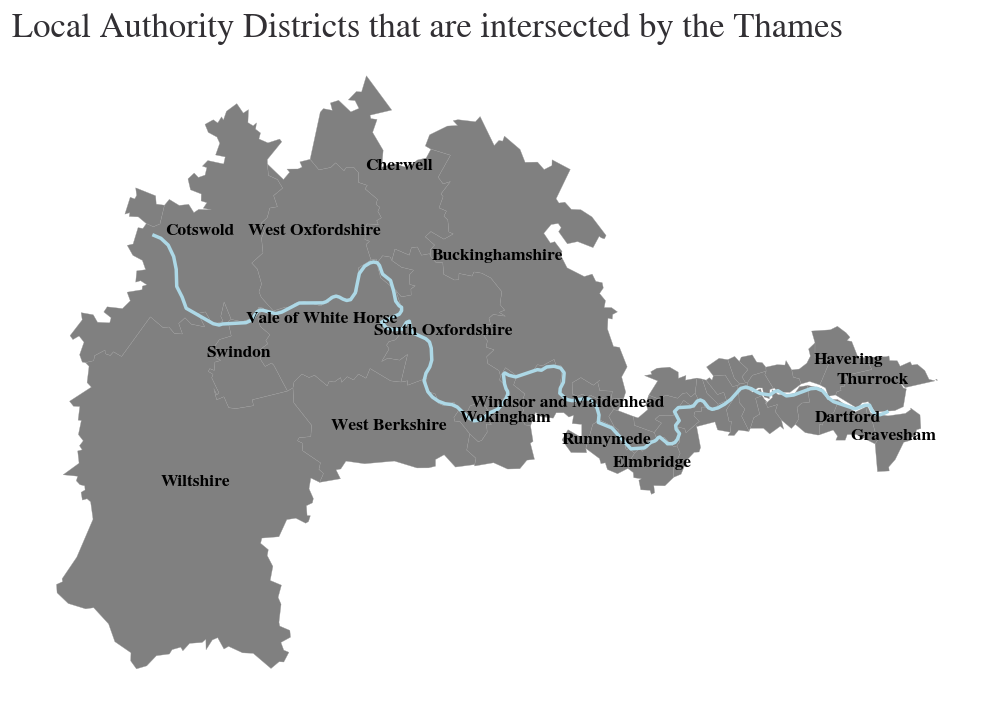

In [20]:
river_intersect_plot("Thames")

### Computing distances

Computing the distances between two points `a` and `b` (in the same CRS) is achieved using the `a.distance(b)` command. 

As an example, let's now find out how far it is between two regions of interest in our cut of regions around the Trent. We'll pick the East Riding of Yorkshire and Stafford, and then plot them on the map in different colours. Because `geopandas` is so flexible, and there could be multiple geometries with the names 'East Riding of Yorkshire' and 'Stafford' we have to not only select the names we want but, in case there are multiple rows, specify which row. If you just want the first you can use `iloc[0]`, which is what happens in the example below.

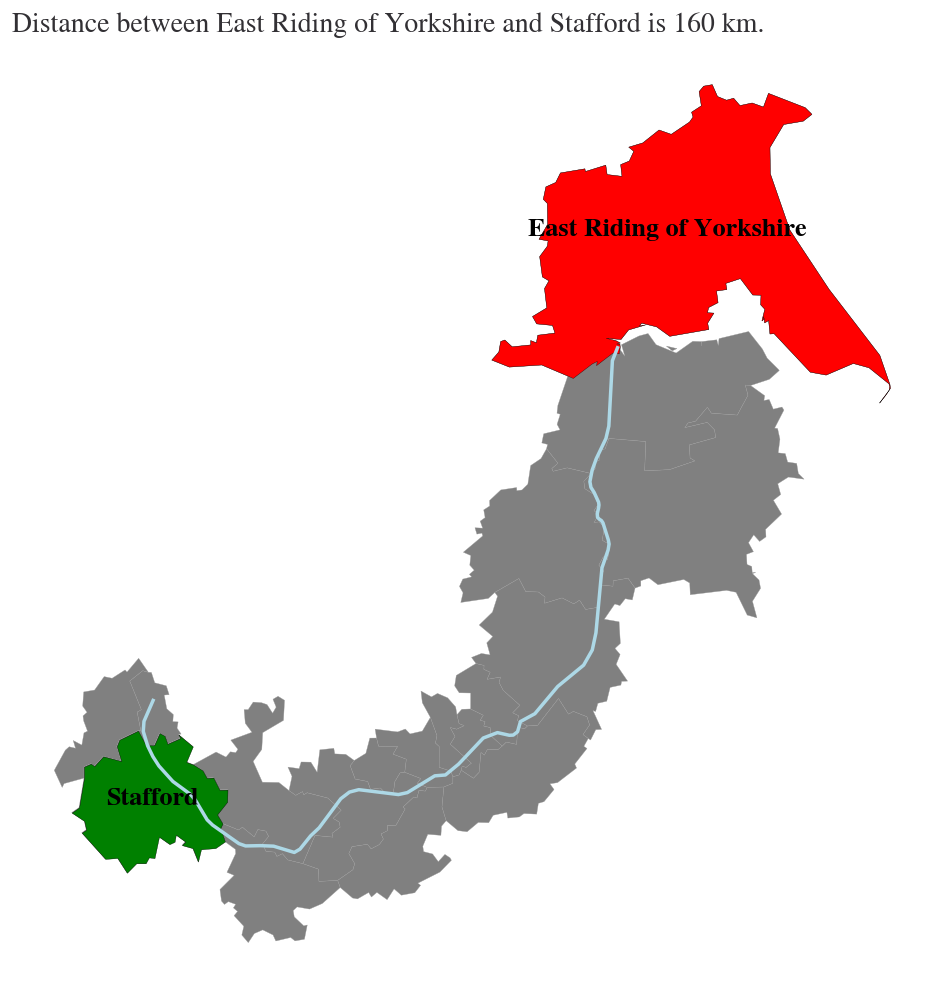

In [21]:
# Get the rows we're interested in out of the dataframe:
name_a = "East Riding of Yorkshire"
name_b = "Stafford"
# This selects the *all rows* that match these conditions, which is why we have to use .iloc[0] thereafter
# to make sure we're only passing a single row.
place_a = df_th.loc[df_th["LAD20NM"] == "East Riding of Yorkshire", :]
place_b = df_th.loc[df_th["LAD20NM"] == "Stafford", :]
# Compute the distance using representative points
dist_a_b = (
    place_a["geometry"]
    .representative_point()
    .iloc[0]
    .distance(place_b["geometry"].representative_point().iloc[0])
)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
df_th.plot(color="grey", ax=ax, edgecolor="0.6")
river.plot(color="lightblue", ax=ax)
place_a.plot(ax=ax, color="red")
place_b.plot(ax=ax, color="green")
for i, place in enumerate([place_a, place_b]):
    ax.annotate(
        text=place["LAD20NM"].iloc[0],
        xy=place["coords"].iloc[0],
        horizontalalignment="center",
        weight="bold",
        fontsize=15,
        color="black",
    )
# Uncomment below to add a connecting line
## Create a line between two rep points in a and b
# connector = LineString([place_a['geometry'].representative_point().iloc[0],
#                        place_b['geometry'].representative_point().iloc[0]])
## Convert it to a geopandas dataframe for easy plotting
# gpd.GeoDataFrame([connector],columns=['line'], geometry='line').plot(ax=ax, linestyle='-.', color='black')
ax.set_title(
    f"Distance between {name_a} and {name_b} is {dist_a_b/1e3:1.0f} km.", loc="left"
)
plt.show()

### Neighbours

It's really useful to have a way to determine all of the adjacent geometries to a given geometry. The `touch` geospatial operation is the best for this *but* do be careful because the level of the detail in polygons varies for different maps and you may find that they sometimes overlap rather than simply touch. So, in the example of finding all of the neighbours for all of the local authority districts in the UK below, not only do we include those LADs that touch, we also include those that overlap.

In [22]:
# Empty list of lists
neighbours_all = [[] for _ in range(len(dfuk))]
# Iterate over rows
for index, row in dfuk.iterrows():
    # Find any touches of this row
    neighbours = dfuk.loc[dfuk["geometry"].touches(row["geometry"]), "LAD20NM"].tolist()
    # Find any overlaps of this row
    overlap = dfuk.loc[dfuk["geometry"].overlaps(row["geometry"]), "LAD20NM"].tolist()
    # Take the union of touches and overlaps
    neighbours = np.union1d(neighbours, overlap)
    # Store the result
    neighbours_all[index] = neighbours

# Put result back into geopandas dataframe (RHS is a list of lists of strings)
dfuk["neighbours"] = neighbours_all

Now we should have an extra column that tells us which regions are adjacent to which by name:

In [23]:
dfuk.head()

OBJECTID    LAD20CD               LAD20NM LAD20NMW   BNG_E   BNG_N  \
0         1  E06000001            Hartlepool     None  447160  531474   
1         2  E06000002         Middlesbrough     None  451141  516887   
2         3  E06000003  Redcar and Cleveland     None  464361  519597   
3         4  E06000004      Stockton-on-Tees     None  444940  518183   
4         5  E06000005            Darlington     None  428029  515648   

      LONG      LAT    Shape__Are    Shape__Len  \
0 -1.27018  54.6761  9.660727e+07  50737.909874   
1 -1.21099  54.5447  5.523093e+07  35500.289988   
2 -1.00608  54.5675  2.483255e+08  85085.268776   
3 -1.30664  54.5569  2.052160e+08  88846.876387   
4 -1.56835  54.5353  1.988128e+08  91926.839545   

                                            geometry  river  \
0  POLYGON ((448973.593 536745.277, 448986.025 53...  False   
1  POLYGON ((451894.299 521145.303, 453997.697 51...  False   
2  POLYGON ((478232.599 518788.828, 477689.303 51...  False   
3  POLYGON ((452243.536 526335.188, 451711.300 52...  False   
4  POLYGON ((436388.002 522354.197, 437351.702 52...  False   

                                          neighbours  
0                  [County Durham, Stockton-on-Tees]  
1  [Hambleton, Redcar and Cleveland, Stockton-on-...  
2  [Hambleton, Middlesbrough, Scarborough, Stockt...  
3  [County Durham, Darlington, Hambleton, Hartlep...  
4  [County Durham, Hambleton, Richmondshire, Stoc...

Let's plot an example to be sure we've done it all right!

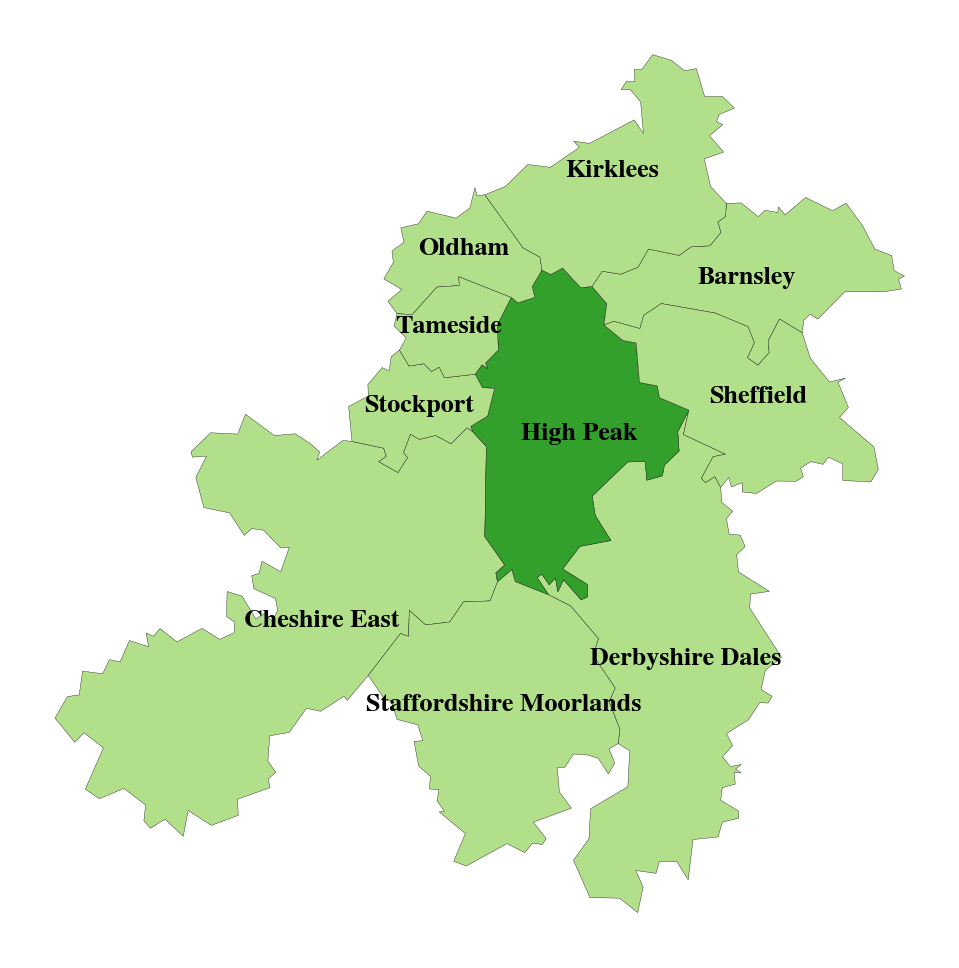

In [24]:
name_of_region = "High Peak"
# Set colors now for ease in plotting
dfuk["color"] = "#b2df8a"
dfuk.loc[dfuk["LAD20NM"] == name_of_region, "color"] = "#33a02c"
# Get representative points to use for text annotation. Note that we want xy coords, hence the fussy use of .apply
dfuk["coords"] = dfuk["geometry"].representative_point().apply(lambda x: x.coords[:][0])
# Get a list of the neighbours--again, this comes out as a dataframe row so we need to call iloc[0] to get first entry
names_neighbours = list(
    dfuk.loc[dfuk["LAD20NM"] == name_of_region, "neighbours"].iloc[0]
)
# Cut to only those areas of interest
df_cut = dfuk.loc[dfuk["LAD20NM"].isin(names_neighbours + [name_of_region])]

fig, ax = plt.subplots(figsize=(10, 10))
df_cut.plot(ax=ax, color=df_cut["color"], edgecolor="k")
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
# Add annotation
for idx, row in df_cut.iterrows():
    ax.annotate(
        text=row["LAD20NM"],
        xy=row["coords"],
        horizontalalignment="center",
        weight="bold",
        fontsize=15,
        color="black",
    )
plt.show()

Hooray! It looks like it worked. And notice how the only variable we need to change to get a different map is `name_of_region`, so this could easily be wrapped up in a function to re-use again. 

For an exercise, why don't you see if you can figure out what's so special about Powys and the Isle of Wight.

## Aggregation and Dissolve

### Dissolve

A useful common map operation is to aggregate by spatial region: i.e. to eliminate some of the granularity of a map by combining smaller regions into larger regions. This is called a 'dissolve' because it dissolves the boundaries between regions to form larger ones.

To demonstrate it, let's take the many UK local authority districts and `dissolve` them into the UK countries. We can do this using the `LAD20CD` column because the code used for it always begins with a letter that represents the country: E for England, W for Wales, N for Northern Ireland, and S for Scotland. So to do the dissolve, we first create a new column just like we would do for a `groupby` in a regular **pandas** dataframe. But instead of using `groupby`, we `dissolve` by the new column. This will give us a new map that is made up of only 4 polygons.

In [25]:
dfuk["country"] = dfuk["LAD20CD"].apply(lambda x: str(x)[0])
dfuk.iloc[:, [1, 2, -1]].head()

LAD20CD               LAD20NM country
0  E06000001            Hartlepool       E
1  E06000002         Middlesbrough       E
2  E06000003  Redcar and Cleveland       E
3  E06000004      Stockton-on-Tees       E
4  E06000005            Darlington       E

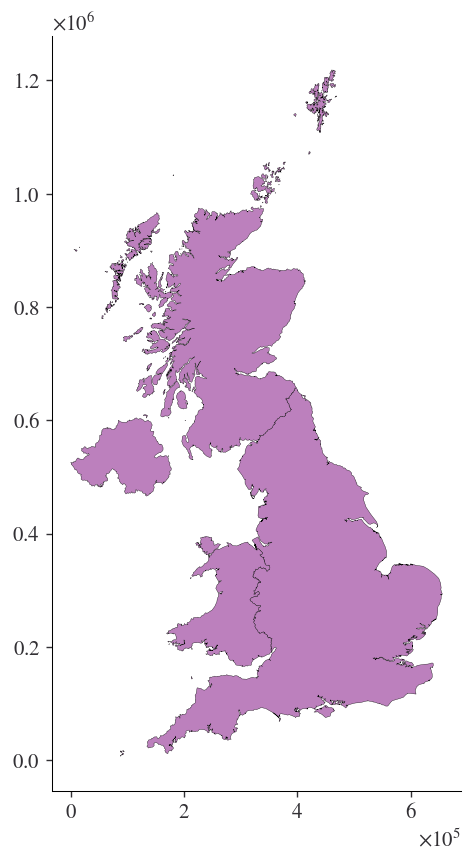

In [26]:
country_uk = dfuk.dissolve(by="country")
country_uk.plot(edgecolor="k");

The default way that columns other than the geometry are combined is by taking the first row of each kind, but dissolve accepts and `agg_func=` argument that you can also pass last, min, max, sum, mean, and median.

### Aggregation

Because **geopandas** builds on **pandas**, all the usual operations (i.e. `groupby`) that you might do on a **pandas** dataframe also work for non-geometry columns.

## Merging data

### Attribute Joins

In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular pandas Series or DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.

### Spatial Joins

Spatial joins are more complex because we take two different sets of geometries and say how to combine them. The key to this is i) ensuring that the datasets have the same CRS and ii) using `sjoin` to perform the spatial join. We'll show how to do a spatial join that is an inner intersection using `op=intersects`. 

We'll take some data on, and a map of, the world, which has per country geometries in plus columns for, eg, gdp per capita, and we'll merge it with a dataframe with the names and positions of cities in. Our intersects spatial join will combine each city (a lat/lon point) with the shapes of countries and determine which city goes in which country (even if it's on the boundary).

This is just one example of a spatial join: the other possible arguments to `op` are `within` and `contains`.

In [27]:
# Grab a world map that has extra data in
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [28]:
# Grab data on cities
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
# Force cities and world to share the world CRS:
cities = cities.to_crs(world.crs)
cities.head()

name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino  POINT (12.44177 43.93610)
2         Vaduz   POINT (9.51667 47.13372)
3    Luxembourg   POINT (6.13000 49.61166)
4       Palikir  POINT (158.14997 6.91664)

In [29]:
cities_with_country = gpd.sjoin(cities, world, how="inner", op="intersects")
cities_with_country.head()

name_left                   geometry  index_right   pop_est continent  \
0    Vatican City  POINT (12.45339 41.90328)          141  62137802    Europe   
1      San Marino  POINT (12.44177 43.93610)          141  62137802    Europe   
192          Rome  POINT (12.48131 41.89790)          141  62137802    Europe   
2           Vaduz   POINT (9.51667 47.13372)          114   8754413    Europe   
184        Vienna  POINT (16.36469 48.20196)          114   8754413    Europe   

    name_right iso_a3  gdp_md_est  
0        Italy    ITA   2221000.0  
1        Italy    ITA   2221000.0  
192      Italy    ITA   2221000.0  
2      Austria    AUT    416600.0  
184    Austria    AUT    416600.0

Now we have our cities, and their points, merged into a dataset that also gives the continent and other data that was originally only in our `world` dataframe.

## Geocoding

Geocoding is the process of taking an address or the name of a place and retrieving its position in a geographic co-ordinate system. There are many entities you might want to do this for, such as cities, landmarks, geographic features like rivers, and postal code. Reverse geocoding takes a latitute and longitude and works backwards to work out the name of the object that's there.

Geocoding as a service is offered by several providers, including Geocodio, Google’s geocode API service, Bing, OpenStreetMap, and more. Some of these charge, especially for volume. 

There are two parts of geocoding: one is the interface that you use to issue the command (the front-end, the bit you see), and another is that does the actual geocoding (the back-end, an API you don't see). The back-end bit is what you sometimes have to pay for as a service if you're geocoding at scale.

We'll look at a geocoding package that comes in two different forms: [**Geopy**](https://geopy.readthedocs.io/en/stable/), which is a Python package that provides a front end for a large number of geocoding APIs, including OpenStreetMap, Bing, Google, ArcGIS, and more. You may also want to explore the [**geocoder**](https://geocoder.readthedocs.io/) Python package as an alternative.

### Geopy stand-alone

Below is an example of using **Geopy** as a stand-alone package. We’ll use the OpenStreetMap API to do the geocoding, which is called `Nominatim`. It’s important to note that this API has some fair usage conditions including a maximum of 1 request per second, that you provide an informative ‘user agent’ parameter, and that you clearly display attribution (thank you OpenStreetMap!). For bulk geocoding, you may need to pay a fee to a provider.

Let's see an example retrieving the full address of a landmark:

In [30]:
# If you don't have it, install geopy using 'pip install geopy'
from geopy.geocoders import Nominatim

# Create a geolocator using Open Street Map (aka Nominatim)
# Use your own user agent identifier here
geolocator = Nominatim(user_agent="codeforecon")

# Pass an address to retrieve full location information:
location = geolocator.geocode("Bank of England")

location.address

'Bank of England, 8AH, Threadneedle Street, Cornhill, City of London, Greater London, England, EC2R 8AH, United Kingdom'

The location parameter also contains a latitude and longitude, which is useful for further geospatial operations:

In [31]:
(location.latitude, location.longitude)

(51.51413225, -0.08892476721255456)

And here's an example of using the same API to do a reverse geocode from a given lat/lon:

In [32]:
# We can also reverse geocode from a lat and lon:
scnd_location = geolocator.reverse("51.529969, -0.127688")

scnd_location.address

'British Library, 96, Euston Road, St Pancras, London Borough of Camden, London, Camden Town, Greater London, England, NW1 2DB, United Kingdom'

### Geopy built-in to geopandas

If you don't want to break out into a separate package, you need not! **geopandas** has its own interface with **geopy**. We'll use it to get the boroughs of ..


In [33]:
boros_df = gpd.GeoDataFrame(
    {"boro_name": ["Staten Island", "Queens", "Brooklyn", "Manhattan", "Bronx"]},
    index=range(5),
)
boros_df.head()

boro_name
0  Staten Island
1         Queens
2       Brooklyn
3      Manhattan
4          Bronx

Next we carry out the geocoding step using `gpd.tools.geocode` and pass an entire column of values that we would like to get `POINT` geometries and address for:

In [34]:
boros_df[["geometry", "address"]] = gpd.tools.geocode(boros_df.boro_name)
boros_df

boro_name                    geometry                       address
0  Staten Island    GEOMETRYCOLLECTION EMPTY                          None
1         Queens  POINT (-73.81730 40.75978)  Queens County, United States
2       Brooklyn  POINT (-73.99100 40.69253)   Brooklyn, NY, United States
3      Manhattan    GEOMETRYCOLLECTION EMPTY                          None
4          Bronx    GEOMETRYCOLLECTION EMPTY                          None

## OpenStreetMap and Osmnx

OpenStreetMap (OSM) is a crowd-sourced project that aims to create a free map of the world containing information about streets, buildings, landmarks, landuse, and more. Its users regularly update the information it holds. Think Wikipedia but for a world map. It excels at highly detailed and freely available renderings of streets.

[**Osmnx**](https://geoffboeing.com/publications/osmnx-complex-street-networks/) is a package that can retrieve, construct, analyze, and visualize street networks from OpenStreetMap {cite}`boeing2017osmnx`. It also does some geocoding on the fly. Let's see it in action and feed in the address we obtained in the geocoding example from earlier; using the `graph_from_point` method will give us the network of streets around a location.

In [35]:
import osmnx as ox

# Fetch OSM street network from the location
graph = ox.graph_from_point(
    (location.latitude, location.longitude), dist=1.3e3, network_type="all"
)

The returned object is of `type` multidigraph, or more precisely `networkx.classes.multidigraph.MultiDiGraph`. This is an object defined in the **networkx** package, and you can find out more about its properties [here](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) but what's important is that, at least here, the network's nodes are where streets meet and its edges are streets.

Rather than plot this as nodes and edges, we can make a much nicer plot of the grid of streets using the below snippet:

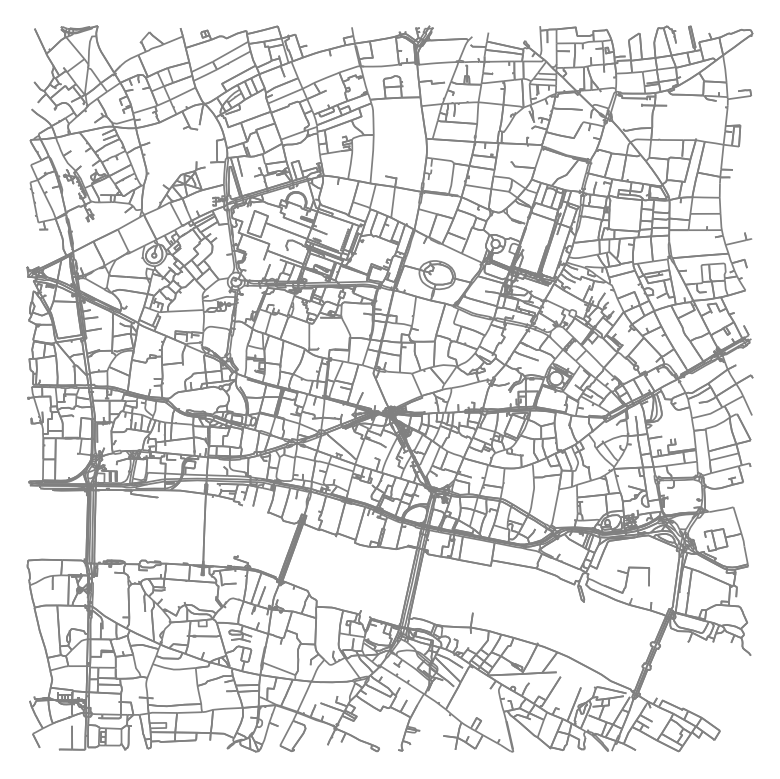

In [36]:
fig, ax = ox.plot_graph(
    graph, bgcolor="white", node_size=0, edge_color="grey", show=False, close=False
)
plt.show()

The channel with few streets is the river Thames.

We can also use **osmnx** to work out the shortest path between nodes. Let's see a practical example: going from Bank, north of the river Thames, to Borough Market (great for lunch), south of the river. First, we need the lat and long of Borough Market.

In [37]:
lunch_loc = geolocator.geocode("Borough Market")
lunch_loc.address

'Borough Market, Stoney Street, Borough, London Borough of Southwark, London, Greater London, England, SE1 9AA, United Kingdom'

Now we find the nearest node to the given locations, and ask **osmnx** to work out a route.

In [38]:
orig = ox.get_nearest_node(graph, (location.latitude, location.longitude))
dest = ox.get_nearest_node(graph, (lunch_loc.latitude, lunch_loc.longitude))
route = ox.shortest_path(graph, orig, dest)

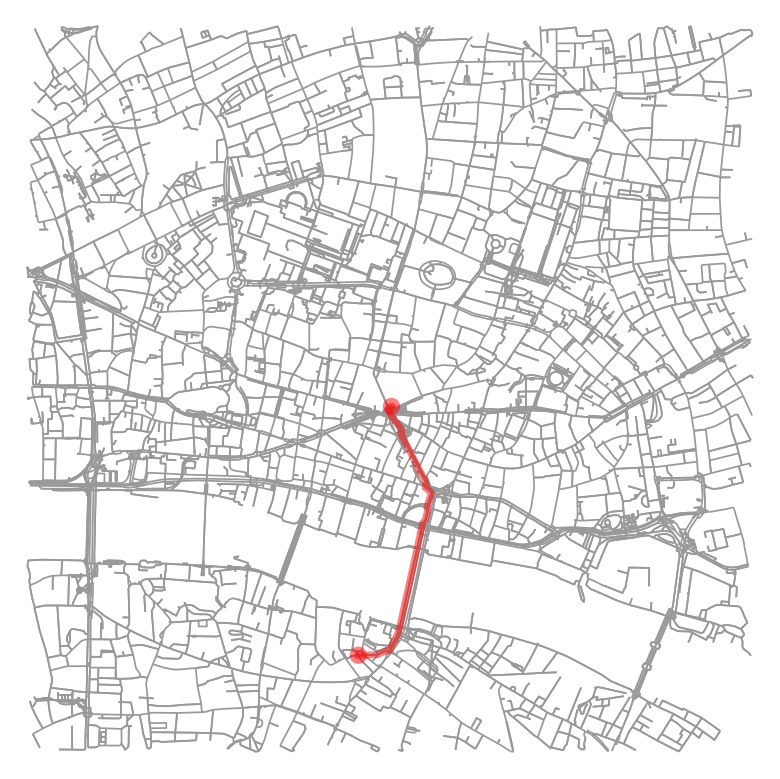

In [39]:
fig, ax = ox.plot_graph_route(
    graph,
    route,
    route_linewidth=4,
    node_size=0,
    bgcolor="white",
    show=False,
    close=False,
)
plt.show()

Okay, you're in Borough Market but you need to decide where exactly to get your lunch from. OpenStreetMap includes information on many kinds of nearby amenities, including `bar`, `cafe`, and `pub`. We can retrieve this information and put it straight into a **geopandas** dataframe using the `geometries_from_place` function.

In [40]:
restaurants = ox.geometries_from_place(
    "Borough Market", tags={"amenity": "restaurant"}, buffer_dist=750
)

/Users/aet/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


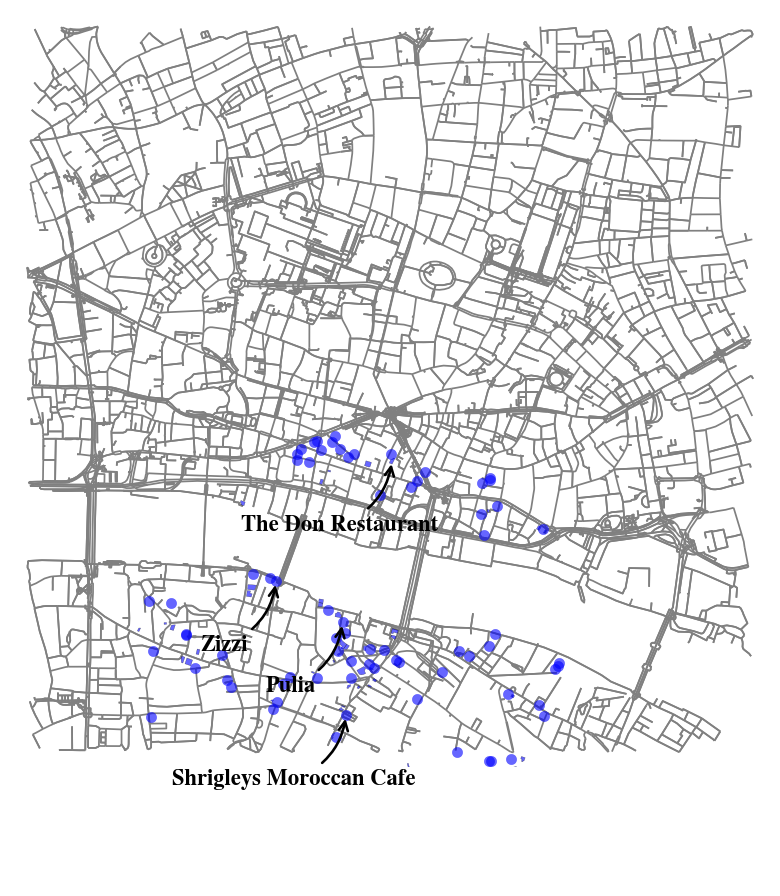

In [41]:
def plot_osm_geoms(osm_df, skip_names=25):
    osm_df["coords"] = (
        osm_df["geometry"].representative_point().apply(lambda x: x.coords[:][0])
    )
    fig, ax = ox.plot_graph(
        graph, bgcolor="white", node_size=0, edge_color="grey", show=False, close=False
    )
    osm_df.plot(ax=ax, color="blue", alpha=0.6)
    for idx, row in osm_df[::skip_names].iterrows():
        ax.annotate(
            text=row["name"],
            xy=row["coords"],
            xytext=(-30, -40),
            textcoords="offset points",
            horizontalalignment="center",
            weight="bold",
            fontsize=13,
            color="black",
            arrowprops=dict(
                arrowstyle="->",
                color="k",
                connectionstyle="arc3,rad=0.3",
                lw=1.5,
            ),
        )
    plt.show()


plot_osm_geoms(restaurants)

`amenity` is just one type of geometry that can be retrieved too: others are `building`, `landuse`, and `leisure`. You can find a list of them [here](https://wiki.openstreetmap.org/wiki/Map_features). For example, here are the (many) churches within around 1km of the Bank of England:

In [42]:
churches = ox.geometries_from_place(
    "Bank of England", tags={"building": "church"}, buffer_dist=1.3e3
)
churches = churches.dropna(subset=["name"])

/Users/aet/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/aet/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/Users/aet/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/geopandas/_vectorized.py:786: DeprecationWarning: An exception was ignored while fetching the attribute `__array_in

/Users/aet/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


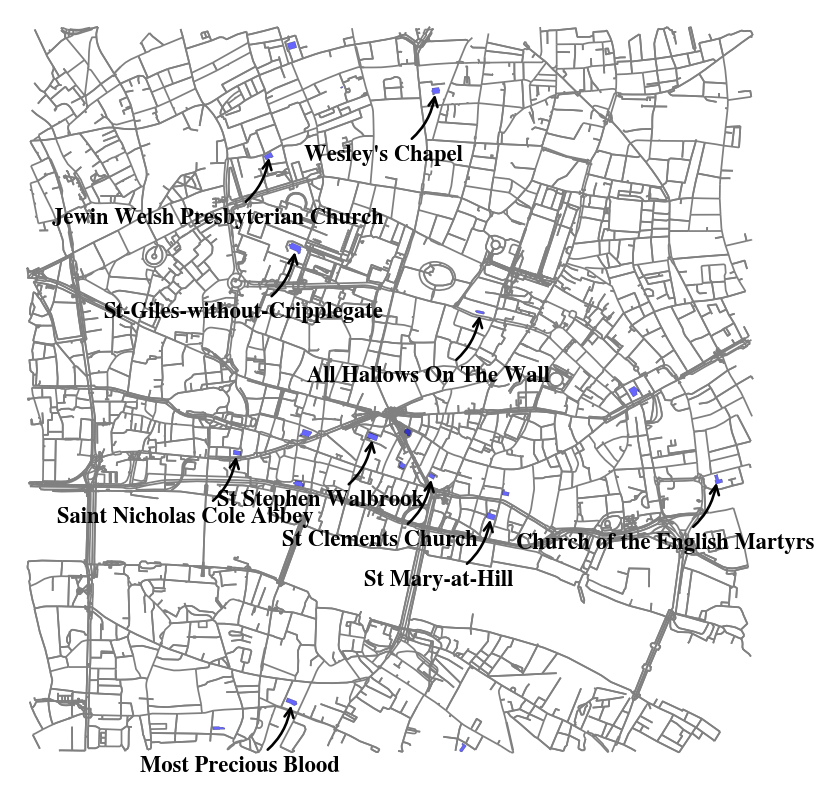

In [43]:
plot_osm_geoms(churches, skip_names=2)

## Review

If you know:

- ✅ what a coordinate reference system (crs) is;
- ✅ how to open and use geospatial data using **geopandas**;
- ✅ how to create quick plots of maps;
- ✅ what points, lines, and polygons are in a geospatial context;
- ✅ how to perform set operations on points, lines, and polygons;
- ✅ how to compute distances, nearest neighbours, and other geospatial properties;
- ✅ how to aggregate, merge, and dissolve geospatial data; and
- ✅ how to use geocoding to retrieve geospatial data

then you have a good grasp of the basics of geospatial analysis!